In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# read csv file into pandas
df = pd.read_csv("quest6.csv")
df.head(20)

,question_id,student_answer,score
0,6,حمزة,0.0
1,6,أبي طالب,2.5
2,6,عمه عبد الله,0.0
3,6,عمه,0.5
4,6,عمه ابو طالب,2.5
5,6,عمه,0.5
6,6,تودو,0.0
7,6,عمه حمزة,0.0
8,6,لا اعلم,0.0
9,6,حليمة السعدية,0.0


In [131]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   question_id     107 non-null    int64  
 1   student_answer  107 non-null    object 
 2   score           107 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [132]:
df.groupby('score').size()

score
0.0    23
0.5    45
2.5    39
dtype: int64

In [133]:
df.duplicated().sum()

73

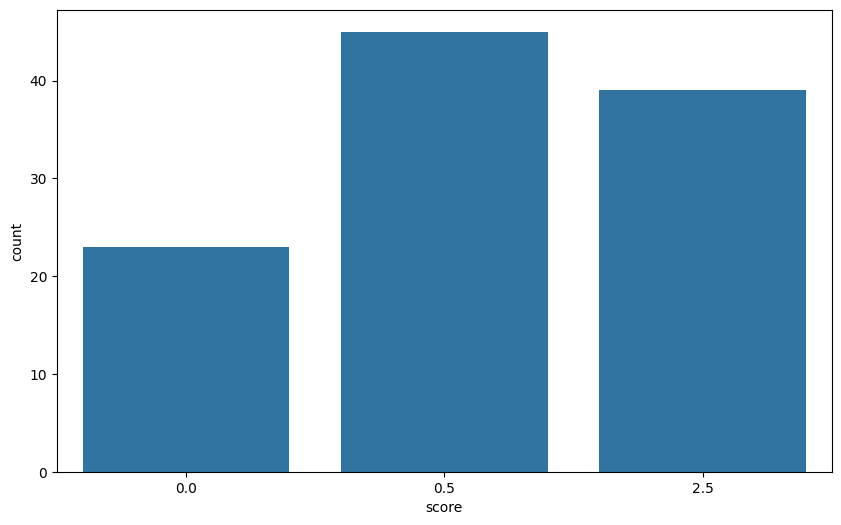

In [134]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [135]:
import pandas as pd
df = pd.read_csv('./quest6.csv')
df1 = pd.DataFrame.drop_duplicates(df)
df2 = pd.DataFrame(df1)
df2['score'] = df2['score'].apply(lambda x : int(x * 2 ))
csv = './question6.csv'
df2.to_csv(csv,index=False)
print(len(df1))

34


In [138]:
df = pd.read_csv("question6.csv")
df.head(20)

,question_id,student_answer,score
0,6,حمزة,0
1,6,أبي طالب,5
2,6,عمه عبد الله,0
3,6,عمه,1
4,6,عمه ابو طالب,5
5,6,عمه,1
6,6,تودو,0
7,6,عمه حمزة,0
8,6,لا اعلم,0
9,6,حليمة السعدية,0


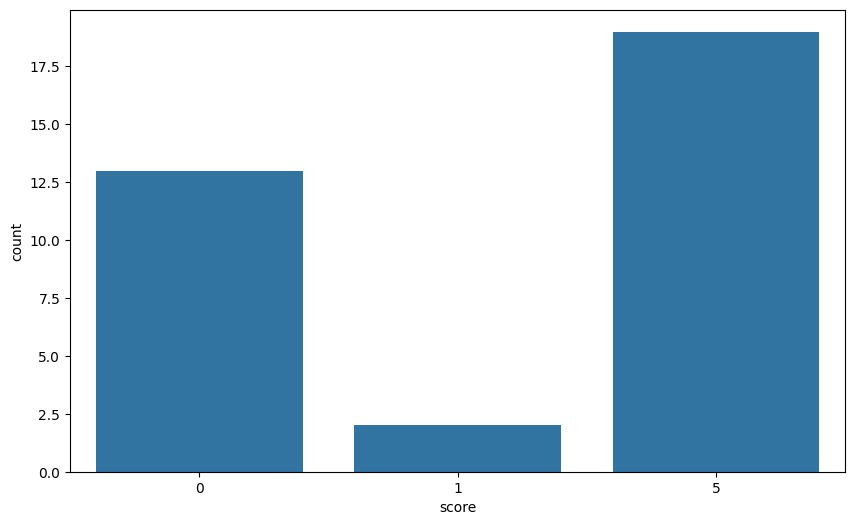

In [139]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [140]:
def txt_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

In [141]:
import nltk
from nltk.tokenize import word_tokenize

In [142]:
df['tokens'] = df['student_answer'].apply(txt_preprocess)

In [143]:
from gensim.models import Word2Vec

In [144]:
model_word2vec = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [145]:
def get_word_vector(tokens, model_word2vec):
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector


df['textvector'] = df['tokens'].apply(lambda x: get_word_vector(x, model_word2vec))

In [146]:
df.head(5)

,question_id,student_answer,score,tokens,textvector
0,6,حمزة,0,[حمزة],"[-0.008727645, 0.00212567, -0.0008724061, -0.0..."
1,6,أبي طالب,5,"[أبي, طالب]","[-0.00043669075, 0.0033170504, -0.0017232504, ..."
2,6,عمه عبد الله,0,"[عمه, عبد, الله]","[-0.023993159, 0.014217767, -0.0022029676, 0.0..."
3,6,عمه,1,[عمه],"[-0.00861494, 0.003679483, 0.0051730634, 0.005..."
4,6,عمه ابو طالب,5,"[عمه, ابو, طالب]","[-0.0010188954, -0.0005414197, 0.009208055, 0...."
